Found 1600 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Class Names: ['cyclone', 'earthquake', 'flood', 'wildfire']


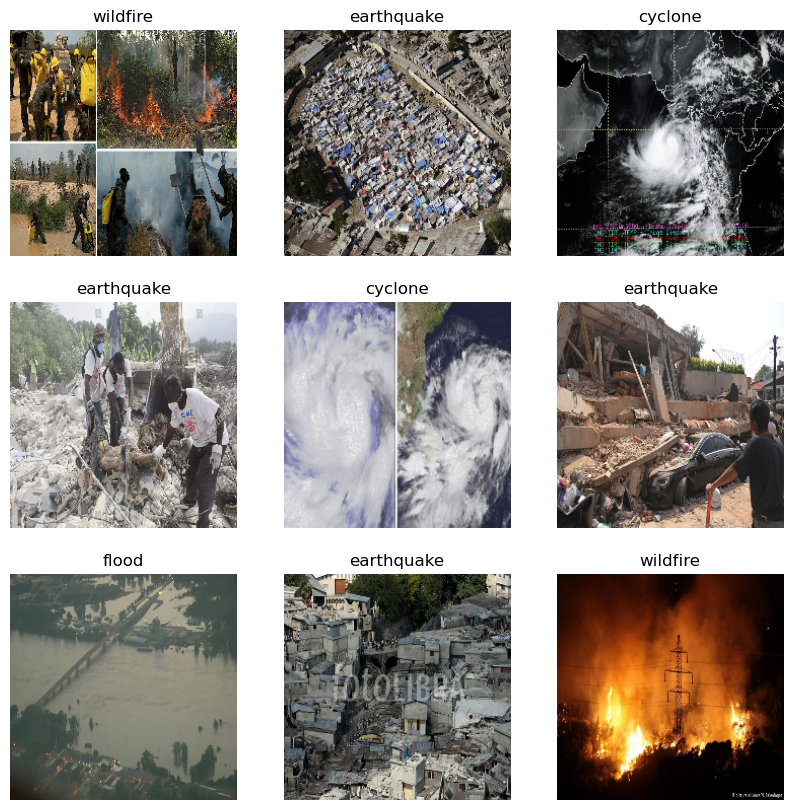

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = "/Users/rohanshenoy/Desktop/DisasterModel"  # Change to your dataset path

batch_size = 32
img_size = (224, 224)  # Resize all images

# Load training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=img_size,
    batch_size=batch_size
)

# Load validation data
val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/validation",
    image_size=img_size,
    batch_size=batch_size
)

# Load test data
test_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/test",
    image_size=img_size,
    batch_size=batch_size
)

# Get class names (folder names)
class_names = train_dataset.class_names
print("Class Names:", class_names)

# Show sample images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [24]:
import os

# Path to dataset
dataset_path = "/Users/rohanshenoy/Desktop/DisasterModel"  # Change to your dataset path

# Count images per class
def count_images_in_folders(base_path):
    class_counts = {}
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):  # Ensure it's a folder
            num_images = len(os.listdir(category_path))
            class_counts[category] = num_images
    return class_counts

# Print class distribution
print("Training Set:", count_images_in_folders(dataset_path + "/train"))
print("Validation Set:", count_images_in_folders(dataset_path + "/validation"))
print("Test Set:", count_images_in_folders(dataset_path + "/test"))


Training Set: {'flood': 400, 'wildfire': 400, 'earthquake': 400, 'cyclone': 400}
Validation Set: {'flood': 100, 'wildfire': 100, 'earthquake': 100, 'cyclone': 100}
Test Set: {'flood': 100, 'wildfire': 100, 'earthquake': 100, 'cyclone': 100}


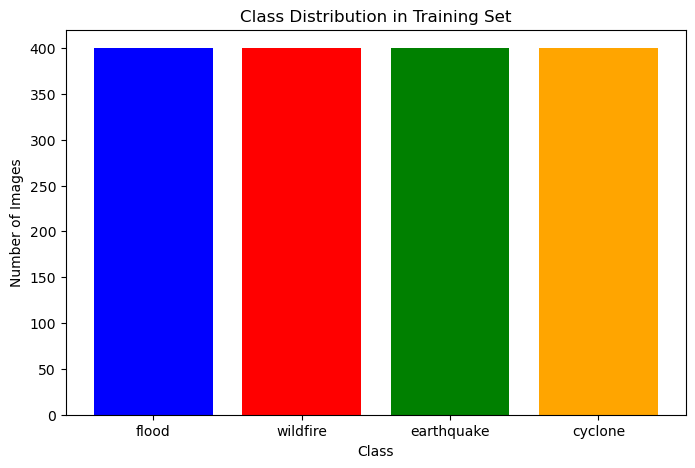

In [25]:
import matplotlib.pyplot as plt

# Count images per class
train_counts = count_images_in_folders(dataset_path + "/train")

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.bar(train_counts.keys(), train_counts.values(), color=['blue', 'red', 'green', 'orange'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.show()


In [32]:
# Load MobileNetV2 but make last few layers trainable
base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = True  # Unfreeze model

# Freeze earlier layers, allow last 50 layers to train
for layer in base_model.layers[:-50]:  
    layer.trainable = False  

# Define the model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="softmax")  # 4 classes
])

# Compile with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),  # Very small LR
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train model again
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)


Epoch 1/20
50/50 [==============================] - 25s 435ms/step - loss: 1.7945 - accuracy: 0.2387 - val_loss: 1.4070 - val_accuracy: 0.2575
Epoch 2/20
50/50 [==============================] - 25s 458ms/step - loss: 1.6597 - accuracy: 0.2713 - val_loss: 1.4061 - val_accuracy: 0.2650
Epoch 3/20
50/50 [==============================] - 24s 456ms/step - loss: 1.6313 - accuracy: 0.2706 - val_loss: 1.4071 - val_accuracy: 0.2750
Epoch 4/20
50/50 [==============================] - 25s 466ms/step - loss: 1.5884 - accuracy: 0.3038 - val_loss: 1.4060 - val_accuracy: 0.2875
Epoch 5/20
50/50 [==============================] - 25s 471ms/step - loss: 1.5436 - accuracy: 0.3019 - val_loss: 1.4025 - val_accuracy: 0.2875
Epoch 6/20
50/50 [==============================] - 25s 472ms/step - loss: 1.4957 - accuracy: 0.3338 - val_loss: 1.3972 - val_accuracy: 0.2950
Epoch 7/20
50/50 [==============================] - 25s 475ms/step - loss: 1.4071 - accuracy: 0.3587 - val_loss: 1.3895 - val_accuracy: 0.3225

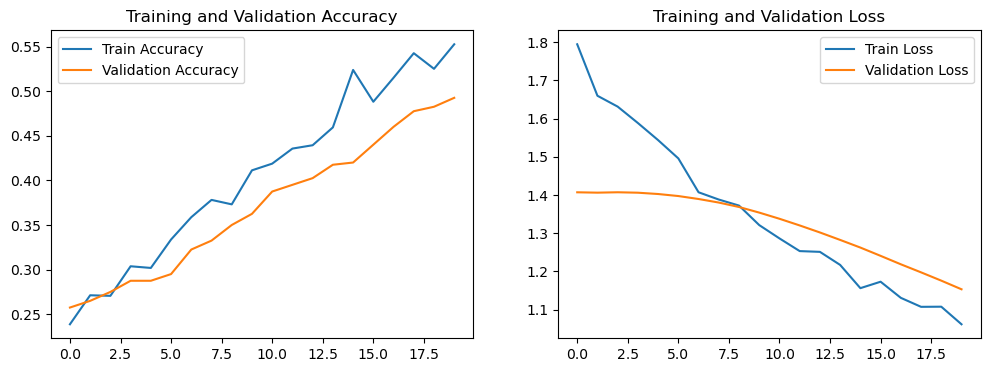

In [33]:
# Plot accuracy and loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(20)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model.save("disaster_classifier.h5")
print("Model saved as disaster_classifier.h5")


# Load trained model
model = tf.keras.models.load_model("disaster_classifier.h5")  # Ensure correct model name

Model saved as disaster_classifier.h5


1/1 [==============================] - 0s 17ms/step


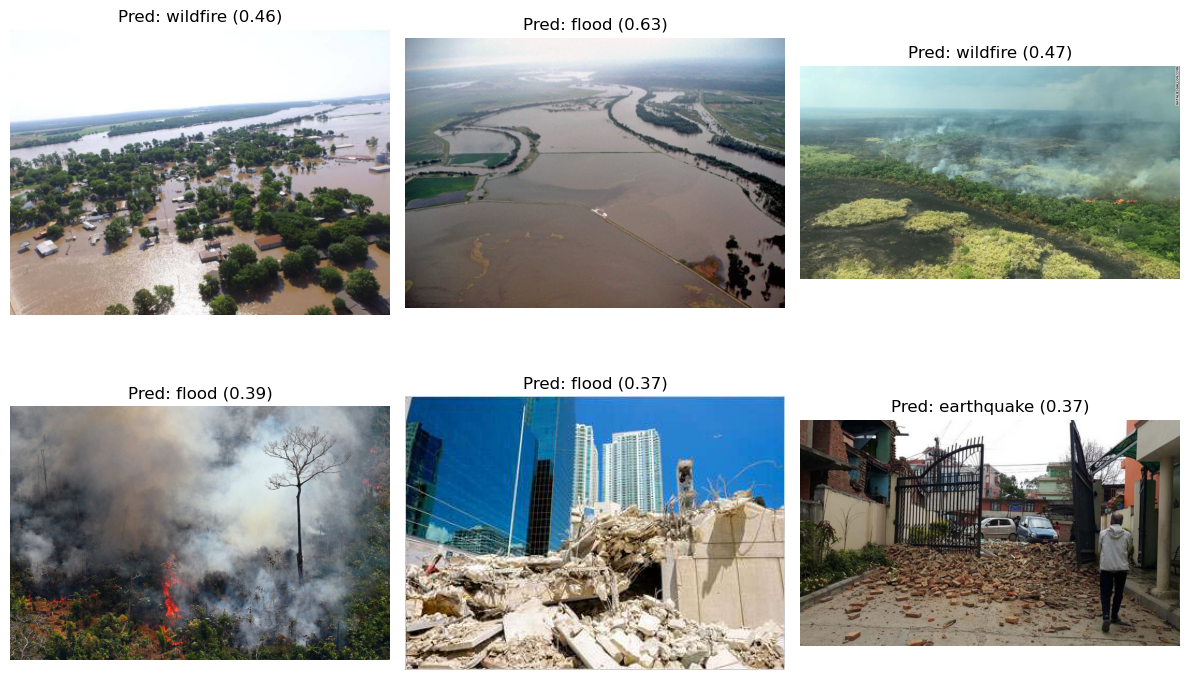

In [37]:
import os
import random

# Folder containing test images (Adjust path)
test_folder = "/Users/rohanshenoy/Desktop/DisasterModel/test"




def preprocess_image(img_path):
    """Load, resize, normalize, and add batch dimension."""
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (same as training dataset)
    return img_array

# Choose 6 random test images
sample_images = []
for class_name in os.listdir(test_folder):  
    class_folder = os.path.join(test_folder, class_name)
    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)
        sample_images += [os.path.join(class_folder, img) for img in random.sample(images, 2)]  # Pick 2 per class

# Plot predictions for 6 images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    img_path = sample_images[i]
    img_array = preprocess_image(img_path)  # Preprocess
    predictions = model.predict(img_array)
    
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    # Display image + prediction
    ax.imshow(image.load_img(img_path))
    ax.set_title(f"Pred: {predicted_class} ({confidence:.2f})")
    ax.axis("off")

plt.tight_layout()
plt.show()
